# <u> Sistemas adaptivos </u>

## Aplicaciones del algoritmo LMS
### Cancelación de ruido
Considere el escenario donde la señal de interés $s(n)$ es adquirida en un ambiente muy ruidoso $\varepsilon(n)$. De hecho, hay muchas situaciones como la mencionada en la vida real (voces en la cabina de un avión, manos libres de un automovil, hablar por un micrófono en un ambiente ruidoso, etc). Asuma que en adición al ruido de la señal, estamos en condiciones de grabar (por ejemplo, con otro micrófono) una señal más, lejos de la señal deseada. En ese caso, la otra señal $\eta(n)$ va a contener ruido solamente. Este ruido, se encuentra altamente correlacionado con el ruido $\varepsilon(n)$ en la señal deseada. En esas situaciones un sistema adaptivo como el de la figura será capaz de cancelar (reducir significativamente) el ruido en la señal deseada.


<img src="doc/esquema.png">

La señal de entrada en este caso es solamente el ruido $\eta(n)$, mientras que la señal de referencia es $s(n)+\varepsilon(n)$. Los ruidos $\eta(n)$ y $\varepsilon(n)$ están altamente correlacionados dado que ambos tienen la misma fuente en común. Sin embargo, los ruidos no son estrictamente los mismos dado que se propagan a través de diferentes trayectorias, y además presentan posibles reflexiones de paredes u objetos. La señal deseada $s(n)$ es estadísticamente independiente del ruido. El sistema adpativo, en un caso ideal, tratará de generar una señal de salida $y(n)$ tan cercana como sea posible a la señal de referencia $s(n)+\varepsilon(n)$. Dado que el ruido de entrada $\eta(n)$ está correlacionado con $\varepsilon(n)$ el sistema logrará la adaptación cuando
\begin{equation*}
\varepsilon(n) = \mathbf{H}^T(n)\mathbf{X}(n)
\end{equation*}
El error entonces es igual a la señal deseada
\begin{equation*}
e(n) = d(n)-y(n)=s(n)+ \varepsilon(n)-\mathbf{H}^T(n)\mathbf{X}(n) = s(n)
\end{equation*}


El ejercicio propuesto consiste en el diseño de un filtro adaptivo cuyos coeficientes se actualizan en función del tiempo para lograr reducir el ruido que contamina a una señal de interés.

Considere una señal $s(n)$ embebida en un ruido elevado $\varepsilon (n)$. La adquisición de la señal se realiza por medio de dos micrófonos. Uno cercano a la fuente de $s(n)$ y el otro lejos de la misma.

La señal $s(n)$ es la señal de interés para el caso de estudio. Al ruido $\varepsilon (n)$ se lo encuentra presente junto con la señal de interés. Este ruido es modelado como ruido blanco Gaussiano de media nula y varianza $\sigma_\varepsilon^2=1$.

Dado que el ruido captado por el micrófono 1, es distinto del que se muestrea por el microfono 2 debido a los efectos del multicamino, rebotes en paredes, etc, se modela a partir de las funciones de transferencias $H_1(z)$ y $H_2(z)$ dichos efectos:

$$
\begin{align*}
    H_1(z) &= 1 + 0.5z^{-1} + 0.2z^{-2} - 0.2z^{-3} + 0.1z^{-4} \\
    H_2(z) &= 1 - 0.2z^{-1} + 0.1z^{-2}
\end{align*}
$$
Usando un sistema adaptivo reduzca el ruido de la señal grabada por el primer micrófono.


<img src="doc/block_diagram.png">

## Generación de señal de entrada
Las señales consisten de una Chirp contaminada con ruido, y otra señal que sea ruido blanco de varianza $\sigma^2=5$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lfilter, firwin, chirp, freqz
from scipy.fftpack import fft,fftshift
from tool._fixedInt import *
from random import *
import sounddevice as sd
import soundfile as sf

In [31]:
# ============================================================================================
# ============================================================================================
# ============================================================================================
GRAFICOS    = 1    # Habilita o deshabilita TODOS LOS GRAFICOS
DEBUG       = 0    # Genera que la memoria de salida y la señal de entrada sea una chirp sin ruido
PIPELINE    = 1    # Usa scripts de python hechos con registros de pipeline
# ============================================================================================
# ============================================================================================
# ============================================================================================
root_path = "/media/kevin/DATA/Cursos/DDA/Practica/TP_final/Informe/"

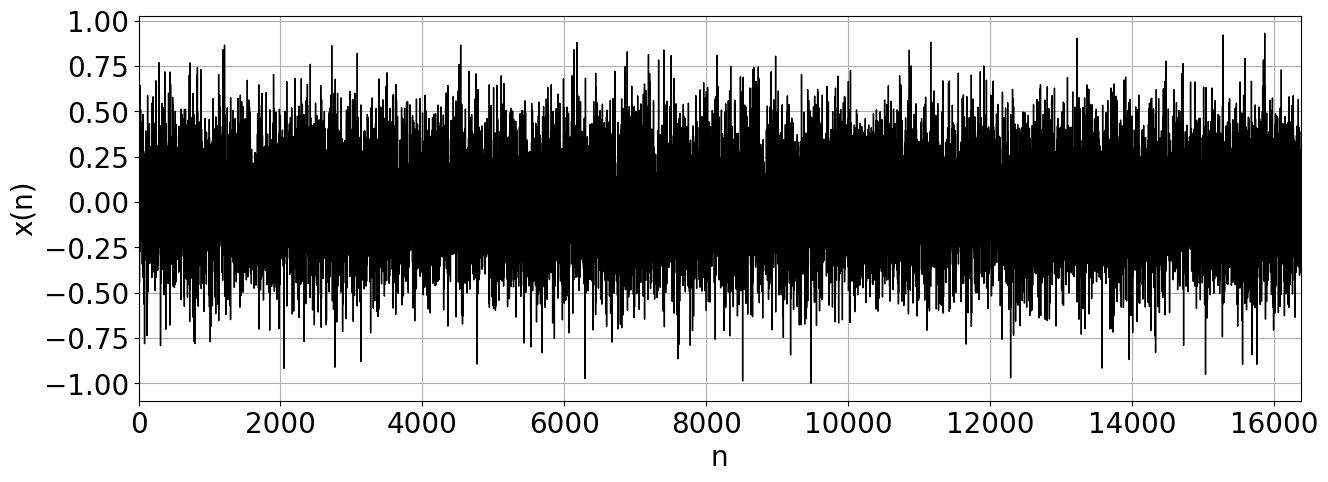

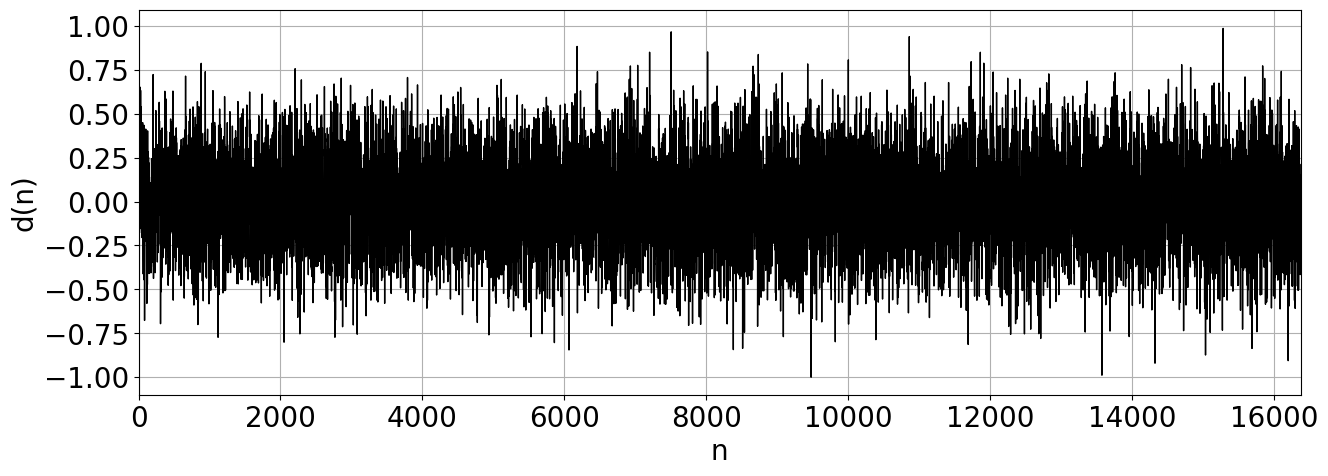

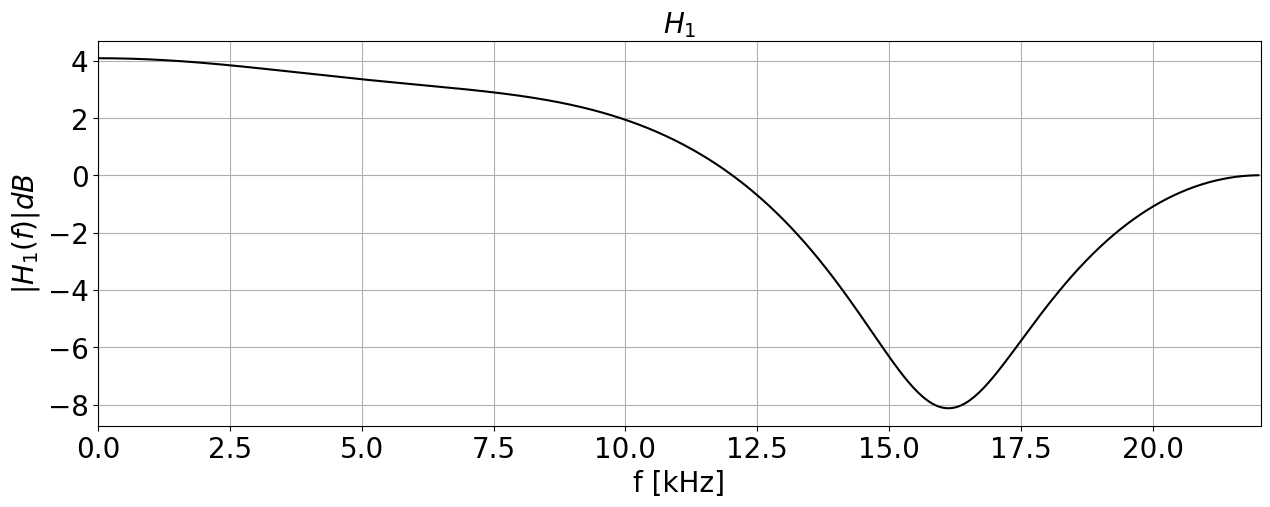

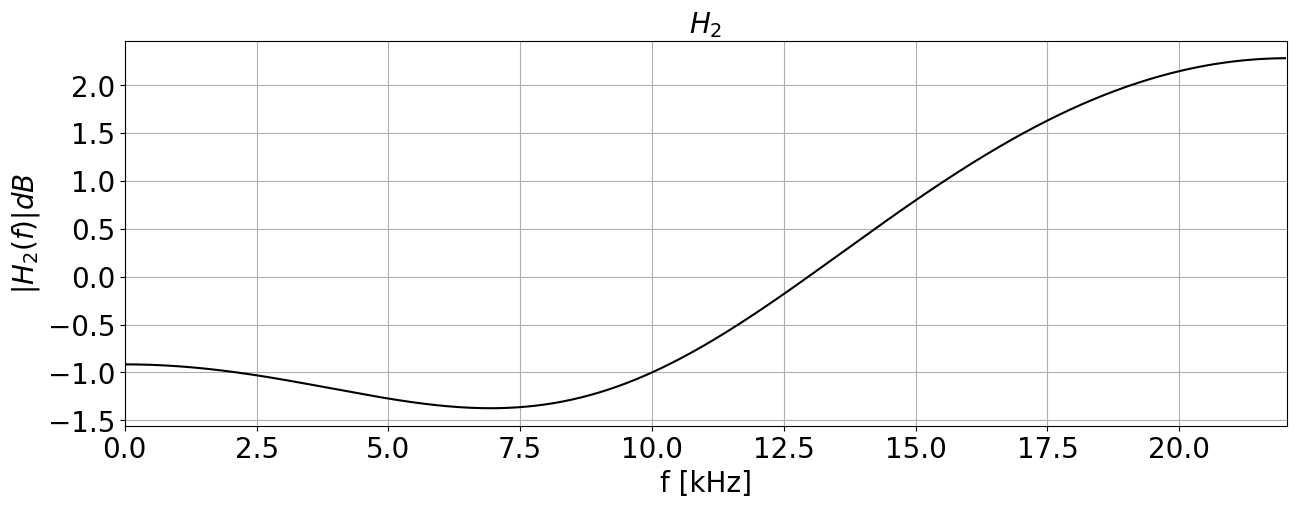

In [3]:
fs      = 44.1e3
Ts      = 1/fs
T       = 2**14/fs 
samples = int(T*fs)
t       = np.arange(0,T, Ts)
N       = len(t)
n       = np.arange(N)

## Respuesta en frecuencia de filtros de ruido
h1      = [1.0, 0.5, 0.2, -0.2, 0.1]
h2      = [1.0, -0.2, 0.1]
w1,H1   = freqz(b=h1, a=1, fs=fs)
w2,H2   = freqz(b=h2, a=1, fs=fs)

## Generacion de señal de interés
s       = chirp(t, 0, T, 20e3, 'linear')

## Generación de ruido en comun
std_w   = np.sqrt(5)
w       = std_w * np.random.randn(N)

## Filtrado de ruido
epsilon = lfilter(b=h1, a=1.0, x=w)
eta     = lfilter(b=h2, a=1.0, x=w)

## Filtrado Antia-aliasing y normalización
if(DEBUG):
    d   = (s+0.0*epsilon) / max(abs(s+0.0*epsilon))
    x   = eta / max(abs(eta))
else:
    d   = (s+epsilon) / max(abs(s+epsilon))
    x   = eta / max(abs(eta))

if(GRAFICOS):
    plt.figure(figsize=(15,5))
    plt.plot(n,x, linewidth=1, color='k')
    plt.xlabel("n", fontsize=20)
    plt.ylabel("x(n)", fontsize=20)
    plt.xlim([0, N])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)
    # plt.savefig(root_path + "filter/mic1.svg")

    plt.figure(figsize=(15,5))
    plt.plot(n,d, linewidth=1, color='k')
    plt.xlabel("n", fontsize=20)
    plt.ylabel("d(n)", fontsize=20)
    plt.xlim([0, N])
    # plt.xlim([0, 2000])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)
    # plt.savefig(root_path + "filter/mic1.svg")

    plt.figure(figsize=(15,5))
    plt.plot(w1/1e3,20*np.log10(abs(H1)), color='k')
    plt.title("$H_1$", fontsize=20, fontweight="bold")
    plt.xlabel("f [kHz]", fontsize=20)
    plt.ylabel("$|H_1(f)| dB$", fontsize=20)
    plt.xlim([0, fs/2/1e3])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)
    # plt.savefig(root_path + "filter/H1.svg")

    plt.figure(figsize=(15,5))
    plt.plot(w2/1e3,20*np.log10(abs(H2)), color='k')
    plt.title("$H_2$", fontsize=20, fontweight="bold")
    plt.xlabel("f [kHz]", fontsize=20)
    plt.ylabel("$|H_2(f)| dB$", fontsize=20)
    plt.xlim([0, fs/2/1e3])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)
    # plt.savefig(root_path + "filter/H2.svg")

# Filtrado de señal por medio del algoritmo LMS

A continuación se implementa la ecuación recursiva que da forma al algorimo LMS para el cálculo de los coeficientes del filtro. Se tiene que

\begin{align*}
\mathbf{H}(n+1) &= \mathbf{H}(n) + \mu \left(d(n)-y(n)\right)\mathbf{X}(n) \\
                &= \mathbf{H}(n) + \mu \left(d(n)-\mathbf{X}^T(n)\mathbf{H}(n)\right)\mathbf{X}(n) \\
                &= \mathbf{H}(n) + \mu e(n)\mathbf{X}(n)
\end{align*}

/tmp/ipykernel_7418/1178593029.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  e[i,0]   = d[i] - y[i]


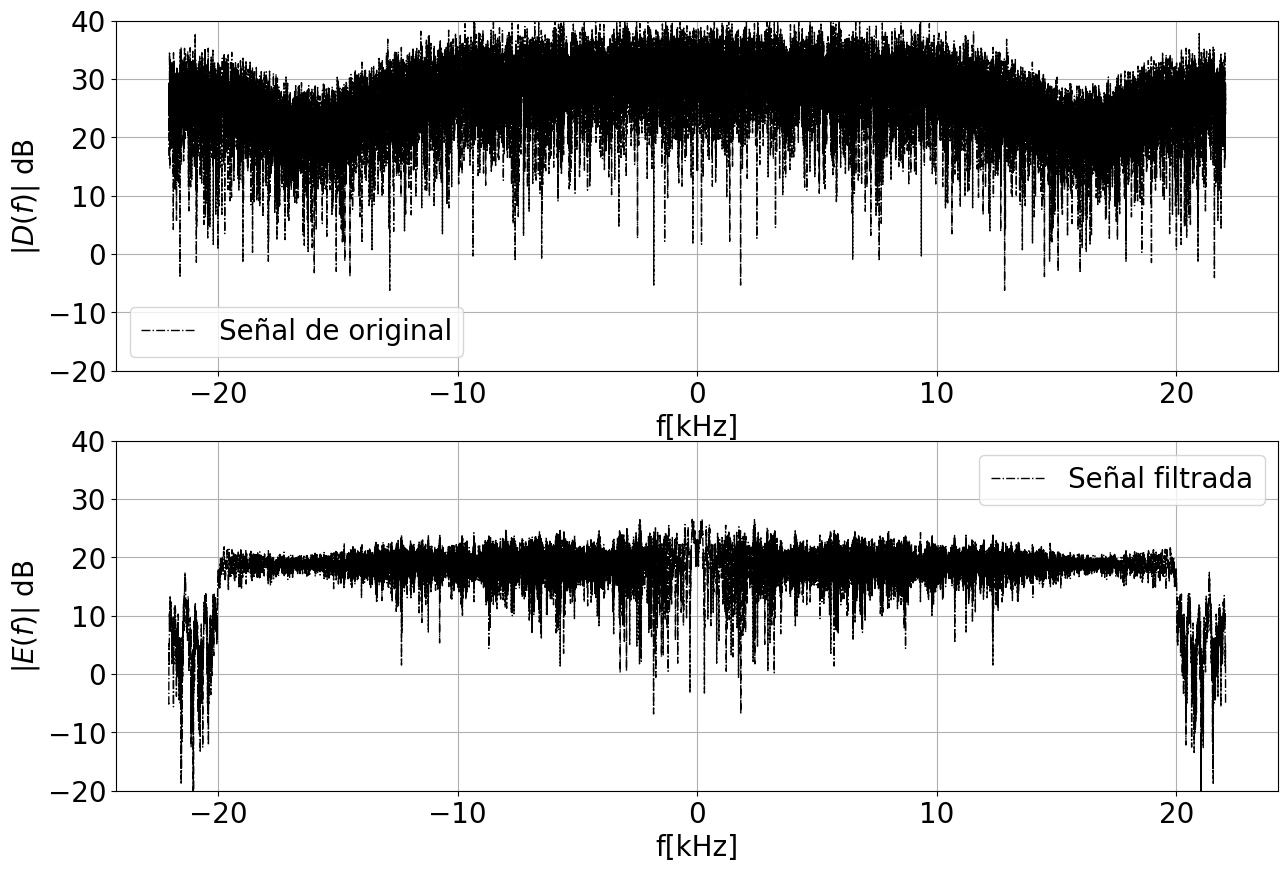

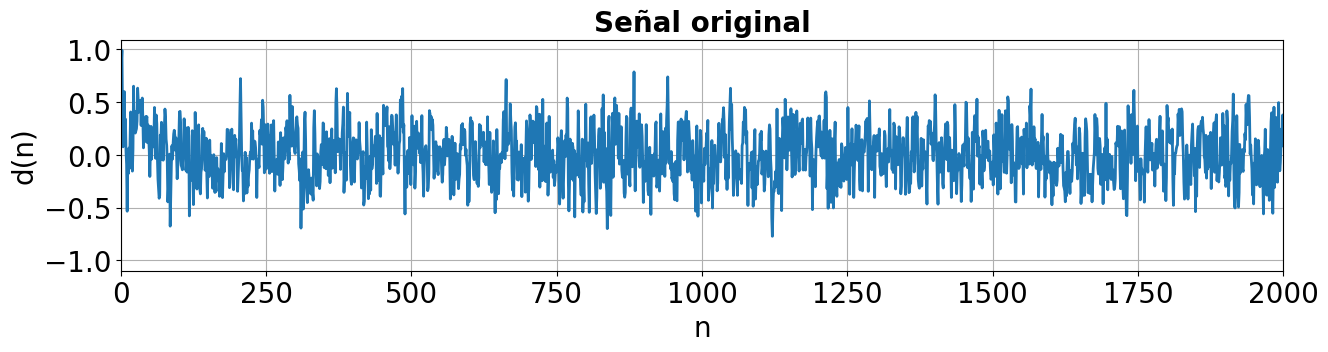

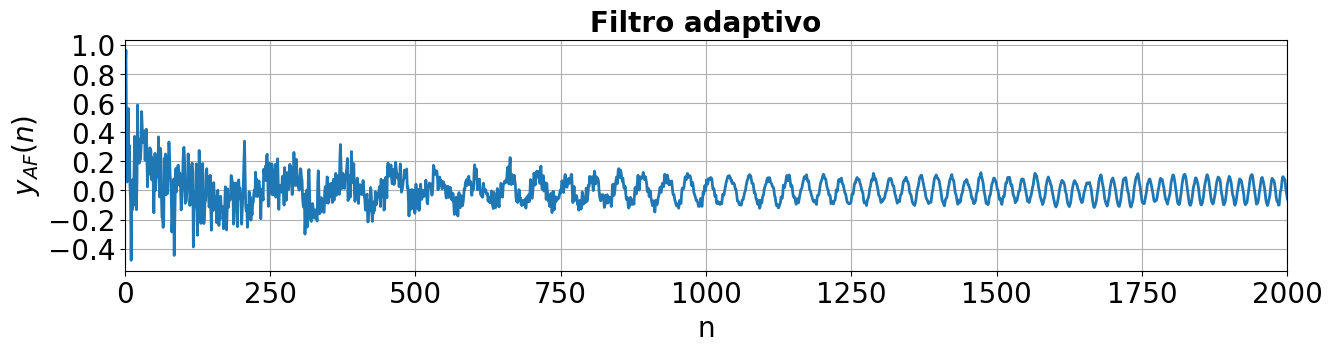

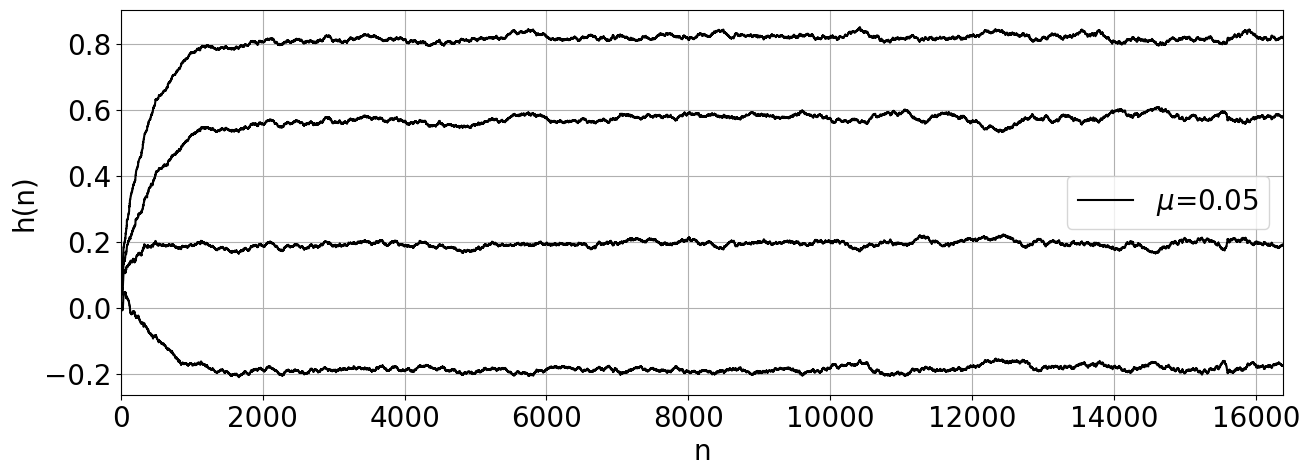

COEFICIENTES FINALES
h[0]=0.8160246379806239
h[1]=0.5797119598818755
h[2]=0.18823121535097534
h[3]=-0.1742787259459793
LA SNR ES DE [17.64205625] dB con mu=0.05


In [4]:
M       = 4                 # M taps
H       = np.zeros([M,N])   # Coeficientes
X       = np.zeros([M,1])   # Muestras

e       = np.zeros([N,1])   # Señal error
y       = np.zeros([N,1])   # Señal filtrada

u       = 0.05              # Paso de iteración

iteraciones = len(x) - 1
for i in range(iteraciones):
    # Registro de desplazamiento 
    X[1:, 0] = X[:-1, 0]
    X[0, 0]  = x[i]
    
    # Calculo de la salida
    y[i]     = np.dot(X[:,0].T, H[:, i])

    # Calculo de error
    e[i,0]   = d[i] - y[i]

    # Actualización de coeficientes
    H[:,i+1] = H[:,i] + u*e[i,0]*X[:,0]

NFFT = N
E = fft(e[:,0], NFFT)
E = fftshift(E)
D = fft(d, NFFT)
D = fftshift(D)
f = np.arange(-fs/2, fs/2 - 1/(2*NFFT*Ts), 1/(NFFT*Ts))

if(GRAFICOS):
    # =============================== FFT PLOT ===============================
    plt.figure(figsize=(15,10))
    plt.subplot(211)
    plt.plot(f/1e3, 10*np.log10(abs(D)**2), '-.k', linewidth=1, label="Señal de original")
    # plt.title("Espectro", fontsize=20, fontweight="bold")
    plt.xlabel("f[kHz]", fontsize=20)
    plt.ylabel("$|D(f)|$ dB", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylim([-20, 40])
    plt.legend(fontsize=20)
    plt.grid(True)

    plt.subplot(212)
    plt.plot(f/1e3, 10*np.log10(abs(E)**2), '-.k', linewidth=1, label="Señal filtrada")
    plt.xlabel("f[kHz]", fontsize=20)
    plt.ylabel("$|E(f)|$ dB", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylim([-20, 40])
    plt.legend(fontsize=20)
    plt.grid(True)
    # plt.savefig(root_path + "filter/spec_float.svg")
    plt.show()

    # =============================== SALIDAS ===============================
    plt.figure(figsize=(15,3))
    plt.plot(n,d, linewidth=2)
    plt.title("Señal original", fontsize=20, fontweight="bold")
    plt.xlabel("n", fontsize=20)
    plt.ylabel("d(n)", fontsize=20)
    plt.xlim([0, 2e3])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(15,3))
    plt.plot(n,e, linewidth=2)
    plt.title("Filtro adaptivo", fontsize=20, fontweight="bold")
    plt.xlabel("n", fontsize=20)
    plt.ylabel("$y_{AF}(n)$", fontsize=20)
    plt.xlim([0, 2e3])
    # plt.ylim([-20, 20])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)
    plt.show()
    salida_floating_point = e

    # =============================== COEFICIENTES ===============================
    plt.figure(figsize=(15,5))
    for i in range(0,M):
        plt.plot(n,H[i,:],'-k' ,linewidth=1.5, label=f'$\mu$={u}' if i==0 else '')
        # plt.plot(n,H_2[i,:], ':k', linewidth=1, label=f'$\mu$={u_2}' if i==0 else '')
    # plt.title("Coeficientes", fontsize=20, fontweight="bold")
    plt.xlabel("n", fontsize=20)
    plt.ylabel("h(n)", fontsize=20)
    plt.xlim([0, N])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=20)
    plt.grid(True)
    # plt.savefig(root_path + "filter/mu.svg")
    plt.show()

h_final_floating_point = []
print("COEFICIENTES FINALES")
for i in range(M):
    print(f"h[{i}]={H[i,-1]}")
    h_final_floating_point.append(H[i,-1])


# =============================== CALCULO DE SNR ===============================
adpated_noise = lfilter(b=h_final_floating_point, a=1.0, x=x)
input_noise   = epsilon/max(abs(epsilon+s))
ruido = input_noise-adpated_noise
SNR = 10*np.log10(sum(abs(e)**2)/sum(abs(ruido)**2))
print(f"LA SNR ES DE {SNR} dB con mu={u}")

# # =============================== REPRODUCCION DE SEÑAL ===============================
# print(f"Reproduciendo señal ORIGINAL...")
# sd.play(d, fs)
# sd.wait()

# print(f"Reproduciendo señal FILTRADA...")
# sd.play(e, fs)
# sd.wait()
# sd.stop()

| $\mu$ |   M=1   |   M=2   |   M=3   |   M=4   |
|-------|---------|---------|---------|---------|
| 0.01  |0.734 dB |3.620 dB |5.518 dB |18.210 dB|
| 0.05  |0.722 dB |3.545 db |5.383 dB |17.998 dB|
| 0.1   |0.718 dB |3.479 dB |5.320 dB |18.009 dB|
| 0.5   |0.734 dB |3.589 dB |5.472 dB |17.721 dB|
| 1.0   |0.614 dB |3.702 dB |5.450 dB |15.959 dB|

# Efectos de la cuantización

A continuación se realiza el modelado del algoritmo utilizando las mismas señales de entrada pero cuantizadas.

El objetivo es analizar la degradación del sistema a medida que se utilizan diferentes tipos de representación de señal en punto fijo. En principio, se busco utilizar la representación S(8,7). Como la señal se ve sensiblemente dañada, se utilizará una representación que mejore el desempeño. Para el analisis de los efectos de cuantización se calcula el MSE del espectro resultante a la salida del filtro cuantizado vs el filtro en punto flotante. Se han hecho dos análisis, uno con un bit de parte entera, y otro con 2 bits de parte entera.

En el esquema de la figura se muestra el punto donde se realiza la cuantización de las señales.

<img src="doc/cuantizacion.png">

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


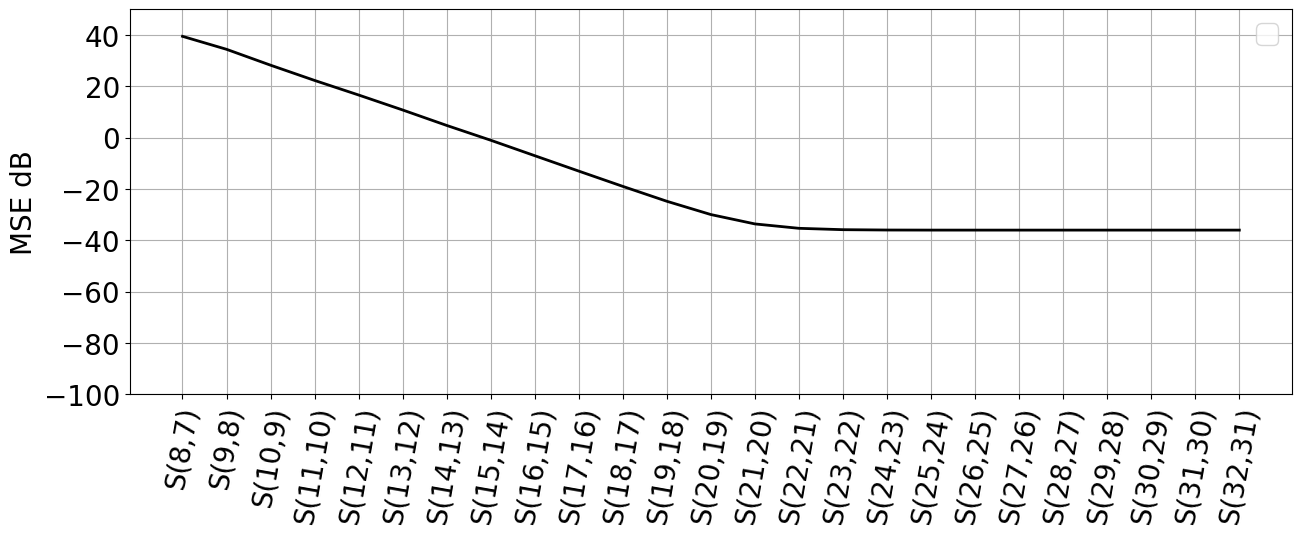

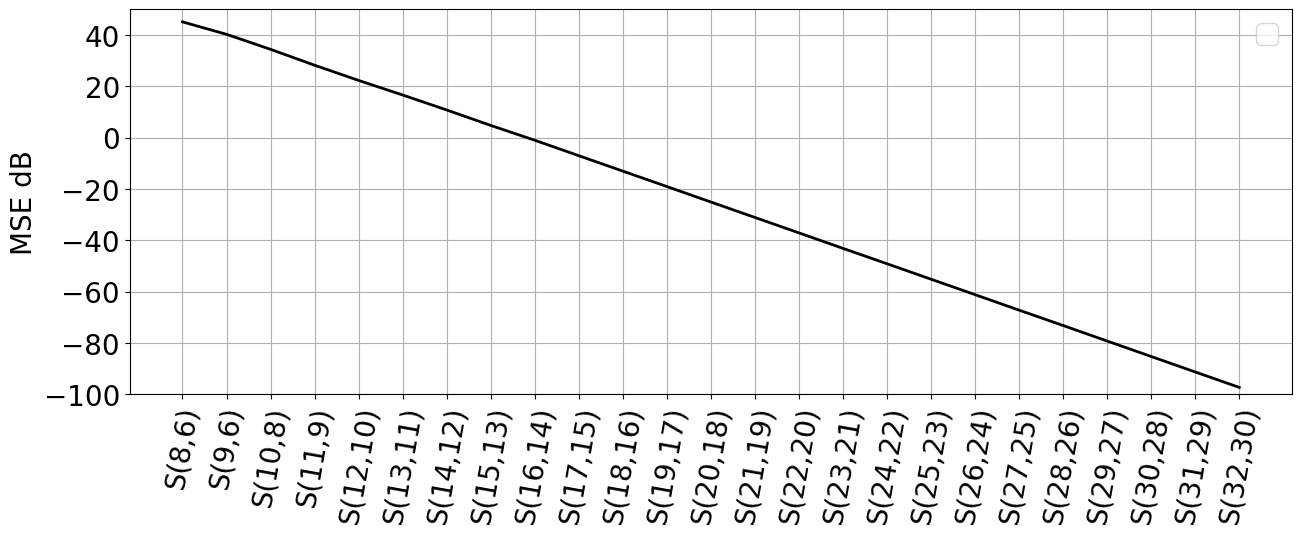

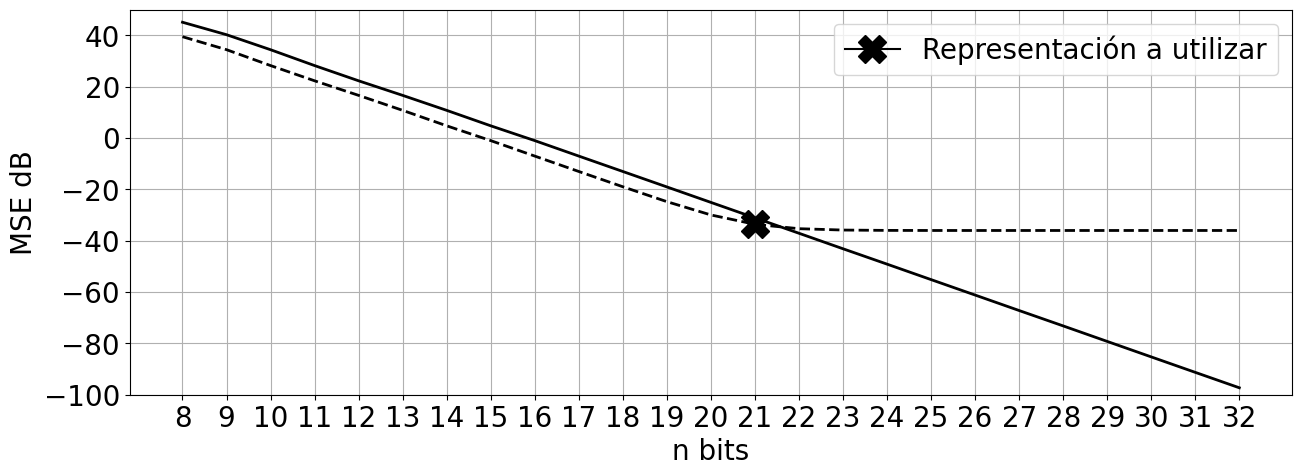

In [5]:
if(GRAFICOS):
    MSE = [8882, 2773, 667, 170, 46, 12, 3, 0.794874284461917, 0.19851803713600513, 0.049812133337797236, 0.012648748766296418, 0.0033288902559982445, 0.0010100050333588897, 0.0004360450314582321, 0.0002942127620638917, 0.00026037055883063325, 0.0002524470653323451, 0.0002507936634249482, 0.00025054331106261224, 0.00025055562081667055, 0.0002506006658910895, 0.0002506300588960381, 0.00025064777185798356, 0.0002506566312461471, 0.00025066148678742873]
    xlabel = ["S(8,7)", "S(9,8)", "S(10,9)", "S(11,10)", "S(12,11)", "S(13,12)", "S(14,13)", "S(15,14)", "S(16,15)", "S(17,16)", "S(18,17)", "S(19,18)", "S(20,19)", "S(21,20)", "S(22,21)", "S(23,22)", "S(24,23)", "S(25,24)", "S(26,25)", "S(27,26)", "S(28,27)", "S(29,28)", "S(30,29)", "S(31,30)", "S(32,31)"]
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(len(MSE)), 10*np.log10(MSE), linewidth=2, color='k')
    # plt.plot([13], [10*np.log10(0.0004360450314582321)], marker='X', color='k', markersize=20, label="Representación seleccionada")
    # plt.title("Utilizando 1 solo bit de parte entera", fontsize=20)
    plt.legend(fontsize=20)
    plt.xticks(np.arange(25) ,xlabel, rotation=80);
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel("MSE dB", fontsize=20)
    plt.ylim([-100, 50])
    plt.grid(True)
    plt.savefig(root_path + "filter/mse_db1.svg")


    MSE2 = [32541, 10632, 2764, 666, 170, 46, 12, 3, 0.7944994100074617, 0.19847008074723269, 0.049812133337797236, 0.012475407640670613, 0.0031145633066758196, 0.0007792283835920789, 0.0001952889604600199, 4.859239458006656e-05, 1.2240249093630611e-05, 3.0534569870329254e-06, 7.64424749922168e-07, 1.9062957778556494e-07, 4.795699104522682e-08, 1.1934828100491781e-08, 2.9755607194618093e-09, 7.436248492683606e-10, 1.8634677708248074e-10]
    xlabel = ["S(8,6)", "S(9,6)", "S(10,8)", "S(11,9)", "S(12,10)", "S(13,11)", "S(14,12)", "S(15,13)", "S(16,14)", "S(17,15)", "S(18,16)", "S(19,17)", "S(20,18)", "S(21,19)", "S(22,20)", "S(23,21)", "S(24,22)", "S(25,23)", "S(26,24)", "S(27,25)", "S(28,26)", "S(29,27)", "S(30,28)", "S(31,29)", "S(32,30)"]
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(len(MSE2)), 10*np.log10(MSE2), linewidth=2, color='k')
    # plt.plot([13], [10*np.log10(0.0007792283835920789)], marker='X', color='k', markersize=20, label="Representación seleccionada")
    # plt.title("Utilizando 2 bits de parte entera", fontsize=20)
    plt.legend(fontsize=20)
    plt.xticks(np.arange(25) ,xlabel, rotation=80);
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel("MSE dB", fontsize=20)
    plt.ylim([-100, 50])
    plt.grid(True)
    plt.savefig(root_path + "filter/mse_db2.svg")

    xlabel = ['8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(len(MSE2)), 10*np.log10(MSE2), linewidth=2, color='k')
    plt.plot(np.arange(len(MSE2)), 10*np.log10(MSE), '--k', linewidth=2)
    plt.plot([13], [10*np.log10(0.0004360450314582321)], marker='X', color='k', markersize=20, label="Representación a utilizar")
    plt.legend(fontsize=20)
    plt.xticks(np.arange(25) ,xlabel, rotation=0);
    plt.xticks(fontsize=20)
    plt.xlabel("n bits", fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel("MSE dB", fontsize=20)
    plt.ylim([-100, 50])
    plt.grid(True)
    plt.savefig(root_path + "filter/mse_db3.svg")

### Generación de señal de entrada

In [6]:
from tool._fixedInt import *
NB_DEPTH = 14
NB_DATA  = 21
NBF_DATA = 20

# Datos utilizados en el calculo de los coeficientes
d_aux_fp = arrayFixedInt(NB_DATA, NBF_DATA, d)
x_aux_fp = arrayFixedInt(NB_DATA, NBF_DATA, x)

d_fp    = np.array([i.fValue for i in d_aux_fp])
x_fp    = np.array([i.fValue for i in x_aux_fp])


### Generación de función de filtrado en punto fijo
La función a implementar debe responder al siguiente RTL:

<img src="doc/sat_trunc_fir.png">

In [7]:
def adaptive_fir(x,d,h):

    NB_PP        = 2*NB_DATA    # (42,40)
    NBF_PP       = 2*NBF_DATA

    NB_PSUM1     = NB_PP + 1    # (43,40)
    NBF_PSUM1    = NBF_PP

    NB_PSUM2     = NB_PSUM1 + 1 # (44,40)
    NBF_PSUM2    = NBF_PP

    NB_PSUM3     = NB_PSUM2 +1  # (45,40)
    NBF_PSUM3    = NBF_PSUM2

    x_fixed         = [DeFixedInt(NB_DATA,NBF_DATA), DeFixedInt(NB_DATA,NBF_DATA), DeFixedInt(NB_DATA,NBF_DATA), DeFixedInt(NB_DATA,NBF_DATA)]
    x_fixed[0].value    = x[0]
    x_fixed[1].value    = x[1]
    x_fixed[2].value    = x[2]
    x_fixed[3].value    = x[3]

    h_fixed         = [DeFixedInt(NB_DATA,NBF_DATA), DeFixedInt(NB_DATA,NBF_DATA), DeFixedInt(NB_DATA,NBF_DATA), DeFixedInt(NB_DATA,NBF_DATA)]
    h_fixed[0].value    = h[0]
    h_fixed[1].value    = h[1]
    h_fixed[2].value    = h[2]
    h_fixed[3].value    = h[3]

    d_fixed         = DeFixedInt(NB_DATA, NBF_DATA)
    d_fixed.value   = d 

    partial_prod    = [DeFixedInt(NB_PP,NBF_PP), DeFixedInt(NB_PP,NBF_PP), DeFixedInt(NB_PP,NBF_PP), DeFixedInt(NB_PP,NBF_PP)]
    partial_sum1    = [DeFixedInt(NB_PSUM1,NBF_PSUM1), DeFixedInt(NB_PSUM1,NBF_PSUM1)]
    partial_sum2    = DeFixedInt(NB_PSUM2,NBF_PSUM2)
    partial_sum3    = DeFixedInt(NB_PSUM3,NBF_PSUM3)

    

    partial_prod[0].value   = x_fixed[0].fValue * h_fixed[0].fValue
    partial_prod[1].value   = x_fixed[1].fValue * h_fixed[1].fValue
    partial_prod[2].value   = x_fixed[2].fValue * h_fixed[2].fValue
    partial_prod[3].value   = x_fixed[3].fValue * h_fixed[3].fValue

    partial_sum1[0].value   = partial_prod[0].fValue + partial_prod[1].fValue
    partial_sum1[1].value   = partial_prod[2].fValue + partial_prod[3].fValue
    partial_sum2.value      = partial_sum1[0].fValue  + partial_sum1[1].fValue
    partial_sum3.value      = d_fixed.fValue - partial_sum2.fValue 

    return partial_sum3.fValue

###  Algoritmo LMS
Ahora, la función que represente las operaciones realizadas por el algoritmo LMS deberá seguir al siguiente RTL:

<img src="doc/sat_trunc_lms.png">

In [8]:
def lms(x, h, e, mu):

    NB_PP    = 3*NB_DATA
    NBF_PP   = 3*NBF_DATA

    NB_PSUM  = NB_PP + 1
    NBF_PSUM = NBF_PP
    
    h_out = np.zeros(M)
    
    e_fixed         = DeFixedInt(NB_DATA, NBF_DATA)
    e_fixed.value   = e

    u               = DeFixedInt(NB_DATA, NBF_DATA)
    u.value         = mu
    
    uxe             = DeFixedInt(2*NB_DATA, 2*NBF_DATA)
    uxe.value       = u.fValue * e_fixed.fValue

    partial_prod    = [DeFixedInt(NB_PP, NBF_PP), DeFixedInt(NB_PP, NBF_PP), DeFixedInt(NB_PP, NBF_PP), DeFixedInt(NB_PP, NBF_PP)]
    partial_sum     = [DeFixedInt(NB_PSUM, NBF_PSUM), DeFixedInt(NB_PSUM, NBF_PSUM), DeFixedInt(NB_PSUM, NBF_PSUM), DeFixedInt(NB_PSUM, NBF_PSUM)]

    x_fixed         = [DeFixedInt(NB_DATA,NBF_DATA), DeFixedInt(NB_DATA,NBF_DATA), DeFixedInt(NB_DATA,NBF_DATA), DeFixedInt(NB_DATA,NBF_DATA)]
    x_fixed[0].value    = x[0]
    x_fixed[1].value    = x[1]
    x_fixed[2].value    = x[2]
    x_fixed[3].value    = x[3]

    h_fixed         = [DeFixedInt(NB_DATA,NBF_DATA), DeFixedInt(NB_DATA,NBF_DATA), DeFixedInt(NB_DATA,NBF_DATA), DeFixedInt(NB_DATA,NBF_DATA)]
    h_fixed[0].value    = h[0]
    h_fixed[1].value    = h[1]
    h_fixed[2].value    = h[2]
    h_fixed[3].value    = h[3]

    partial_prod[0].value   = uxe.fValue * x_fixed[0].fValue
    partial_prod[1].value   = uxe.fValue * x_fixed[1].fValue
    partial_prod[2].value   = uxe.fValue * x_fixed[2].fValue
    partial_prod[3].value   = uxe.fValue * x_fixed[3].fValue

    partial_sum[0].value    = partial_prod[0].fValue + h_fixed[0].fValue
    partial_sum[1].value    = partial_prod[1].fValue + h_fixed[1].fValue
    partial_sum[2].value    = partial_prod[2].fValue + h_fixed[2].fValue
    partial_sum[3].value    = partial_prod[3].fValue + h_fixed[3].fValue

    h_out[0]                = partial_sum[0].fValue
    h_out[1]                = partial_sum[1].fValue
    h_out[2]                = partial_sum[2].fValue
    h_out[3]                = partial_sum[3].fValue

    return h_out

### Filtrado de señal con las funciones previas
A continuación, utilizando las funciones creadas previamente, se filtra a la señal

In [28]:
if (PIPELINE):
    X     = np.zeros([M,2])
    H     = np.zeros([M,N])
    error = np.zeros([1,2])
    e     = []

    iteraciones = len(x_fp) - 1
    for ii in range(iteraciones):
        X[1:, 0] = X[:-1, 0]
        X[0, 0]  = x_fp[ii]

        error[0,0] = adaptive_fir(x=X[:,0], h=H[:,ii], d=d_fp[ii])
        H[:,ii+1] = lms(x=X[:,1], h=H[:,ii], e=error[0,1], mu=u)
        
        e.append(error[0,0])
        X[:, 1] = X[:, 0]
        error[0,1] = error[0,0]
else:
    X     = np.zeros([M,1])
    H     = np.zeros([M,N])
    e     = []

    iteraciones = len(x_fp) - 1
    for ii in range(iteraciones):
        X[1:, 0] = X[:-1, 0]
        X[0, 0]  = x_fp[ii]
        error = adaptive_fir(x=X[:,0], h=H[:,ii], d=d_fp[ii])
        e.append(error)

        H[:,ii+1] = lms(x=X[:,0], h=H[:,ii], e=error, mu=u)

### Graficos y reproducción de audio

MSE con S(21,20): 0.007126420167359972


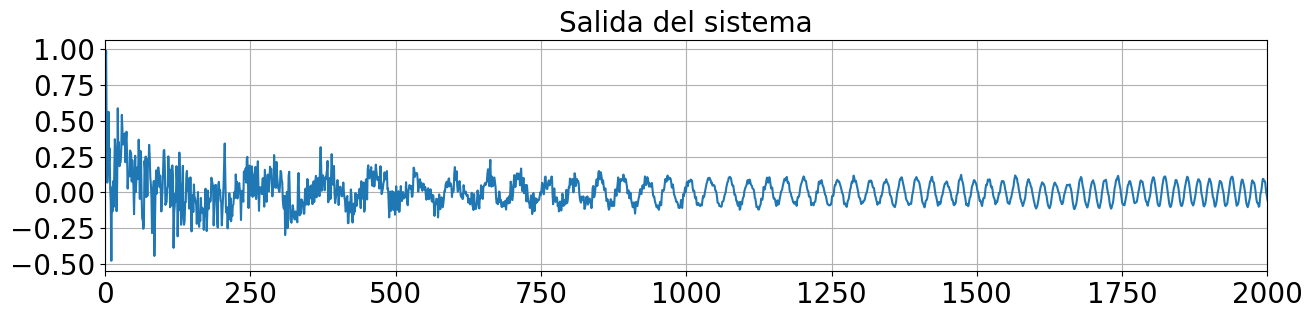

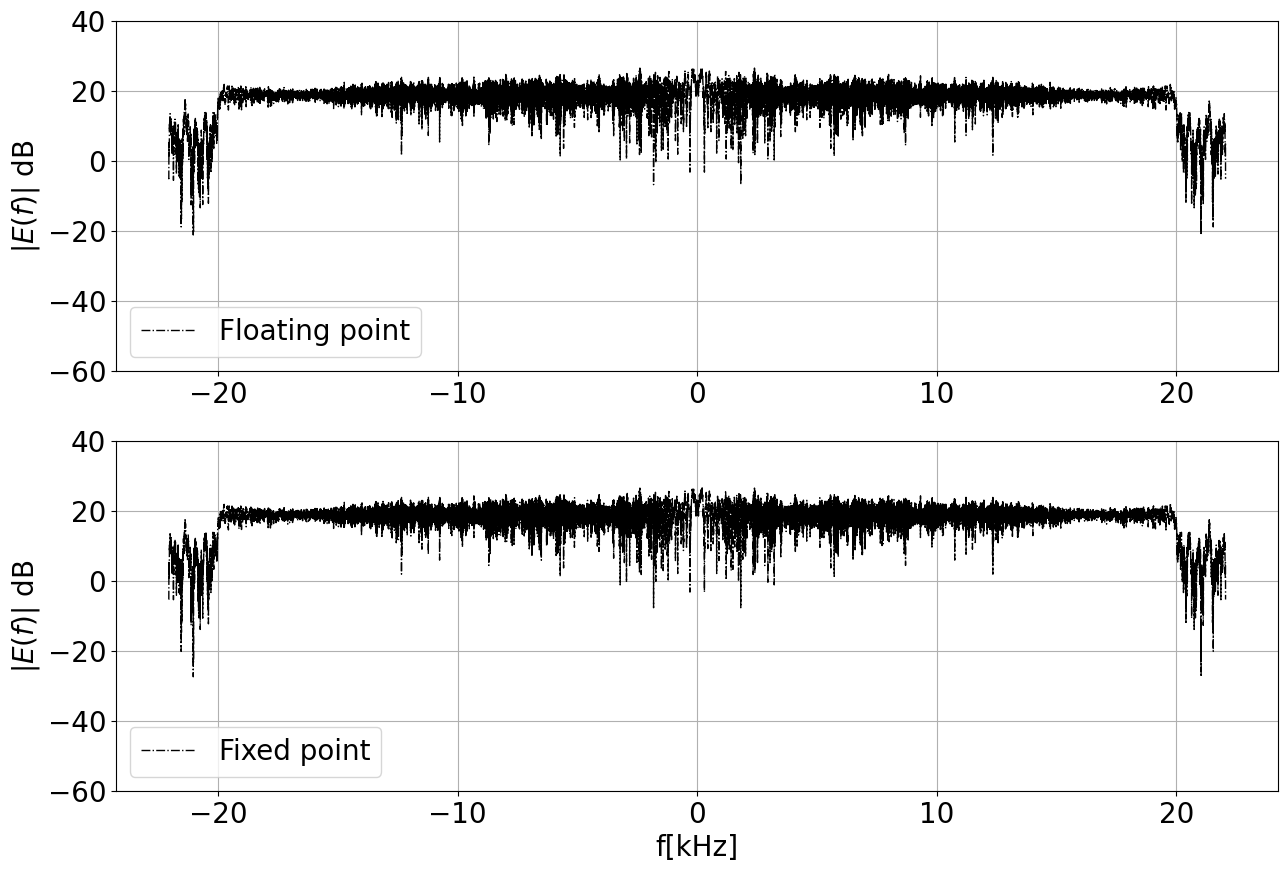

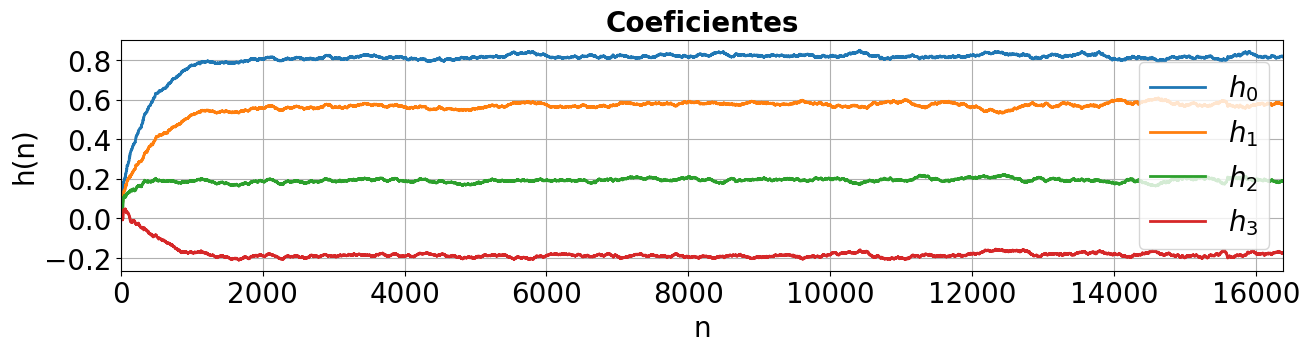



COEFICIENTES FINALES FIXED POINT
h[0]=0.8155553924609267
h[1]=0.5791923392243037
h[2]=0.1882755507692701
h[3]=-0.17455056246971226


COEFICIENTES FINALES FLOATING POINT
h[0]=0.8160246379806239
h[1]=0.5797119598818755
h[2]=0.18823121535097534
h[3]=-0.1742787259459793


In [29]:
NFFT = N
f    = np.arange(-fs/2, fs/2 - 1/(2*NFFT*Ts), 1/(NFFT*Ts))
E_fp = fft(e, NFFT)
E_fp = fftshift(E_fp)
D_fp = fft(d_fp, NFFT)
D_fp = fftshift(D_fp)

MSE = sum(abs(E - E_fp)**2)/len(E)
print(f"MSE con S({NB_DATA},{NBF_DATA}): {MSE}")
if(GRAFICOS):
    # =============================== SALIDAS ===============================
    plt.figure(figsize=(15,3))
    plt.plot(n[:-1], e)
    plt.xlim([0, 2e3])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("Salida del sistema", fontsize=20)
    plt.grid(True)
    salida_fixed_point = e

    # =============================== FFT PLOT ===============================
    plt.figure(figsize=(15,10))
    plt.subplot(211)
    plt.plot(f/1e3, 10*np.log10(abs(E)**2), '-.k', linewidth=1, label="Floating point")
    # plt.title("Espectro", fontsize=20, fontweight="bold")
    plt.ylabel("$|E(f)|$ dB", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylim([-60, 40])
    plt.legend(fontsize=20)
    plt.grid(True)

    plt.subplot(212)
    plt.plot(f/1e3, 10*np.log10(abs(E_fp)**2), '-.k', linewidth=1, label="Fixed point")
    plt.xlabel("f[kHz]", fontsize=20)
    plt.ylabel("$|E(f)|$ dB", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylim([-60, 40])
    plt.legend(fontsize=20)
    plt.grid(True)
    # plt.savefig(root_path + "filter/spec_fix.svg")
    plt.show()

    # =============================== COEFICIENTES ===============================
    colores = ['b', 'r', 'k']
    plt.figure(figsize=(15,3))
    for ii in range(0,M):
        plt.plot(n,H[ii,:], linewidth=2, label=f"$h_{ii}$")
    plt.title("Coeficientes", fontsize=20, fontweight="bold")
    plt.xlabel("n", fontsize=20)
    plt.ylabel("h(n)", fontsize=20)
    plt.xlim([0, N])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=20)
    plt.grid(True)

    plt.show()

h_final_fixed_point = []
print("\n")
print("COEFICIENTES FINALES FIXED POINT")
for ii in range(M):
    print(f"h[{ii}]={H[ii,-1]}")
    h_final_fixed_point.append(H[ii,-1])
print("\n")
print("COEFICIENTES FINALES FLOATING POINT")
for ii in range(M):
    print(f"h[{ii}]={h_final_floating_point[ii]}")



# # =============================== AUDIO ===============================
# print("\n")
# print(f"Reproduciendo señal ORIGINAL...")
# sd.play(d, fs)
# sd.wait()

# print(f"Reproduciendo señal FILTRADA...")
# sd.play(e, fs)
# sd.wait()

# fixed_mu = DeFixedInt(NB_DATA,NBF_DATA)
# fixed_mu.value = u
# print("\n")
# print(f"Valor de mu en hexa: {fixed_mu.__hex__()}")

### Guardando datos en memoria

In [30]:
## Guardando señal para testeo
err_hex     = arrayFixedInt(NB_DATA, NBF_DATA, e)
mic1_hex    = arrayFixedInt(NB_DATA, NBF_DATA, d_fp)
mic2_hex    = arrayFixedInt(NB_DATA, NBF_DATA, x_fp)
mu_hex      = arrayFixedInt(NB_DATA, NBF_DATA, u*np.ones(len(e)))


if(DEBUG):
    out_mem = "src/test/out_debug.mem"
    mic2_mem = "src/test/mic2_debug.mem"
    mic1_mem = "src/test/mic1_debug.mem"
    mu_mem  = "src/test/mu_debug.mem"
else:
    out_mem = "src/test/out.mem"
    mic1_mem = "src/test/mic1.mem"
    mic2_mem = "src/test/mic2.mem"
    mu_mem  = "src/test/mu.mem"


data = open(out_mem, "w")
for i,v in enumerate(err_hex):
    if(i<2**NB_DEPTH-1):
        data.write(f"0x{v.__hex__()}\n")
data.close()

data = open(mic1_mem, "w")
for i,v in enumerate(mic1_hex):
    if(i<2**NB_DEPTH-1):
        data.write(f"0x{v.__hex__()}\n")
data.close()

data = open(mic2_mem, "w")
for i,v in enumerate(mic2_hex):
    if(i<2**NB_DEPTH-1):
        data.write(f"0x{v.__hex__()}\n")
data.close()

data = open(mu_mem, "w")
for i,v in enumerate(mu_hex):
    if(i<2**NB_DEPTH-1):
        data.write(f"0x{v.__hex__()}\n")
data.close()

# Reporte de utilización
## Area

In [58]:
import pandas as pd
x_axis = ["LUT", "FF", "DSP", "IO", "MMCM"]
y_axis = [4.33, 0.45, 18.89, 30.85, 20]
plt.bar(x_axis, y_axis)
plt.grid(True)
plt.yticks(fontsize=20)
plt.ylabel("%", fontsize=20)
plt.xticks(fontsize=20)
# plt.savefig(root_path + "filter/area.svg")

x1_axis = ["LUT", "FF", "DSP", "IO", "MMCM"]
y1_axis = [4.22, 0.56, 18.89, 30.95, 20]
plt.figure()
plt.bar(x_axis, y1_axis, color='r', label="Con pipeline")
plt.bar(x_axis, y_axis, fill=False, edgecolor='b', color=None, label="Sin pipeline")
plt.grid(True)
plt.yticks(fontsize=20)
plt.ylabel("%", fontsize=20)
plt.xticks(fontsize=20)
plt.legend()
plt.savefig(root_path + "filter/utilizacion_pipe.png")

## Timing

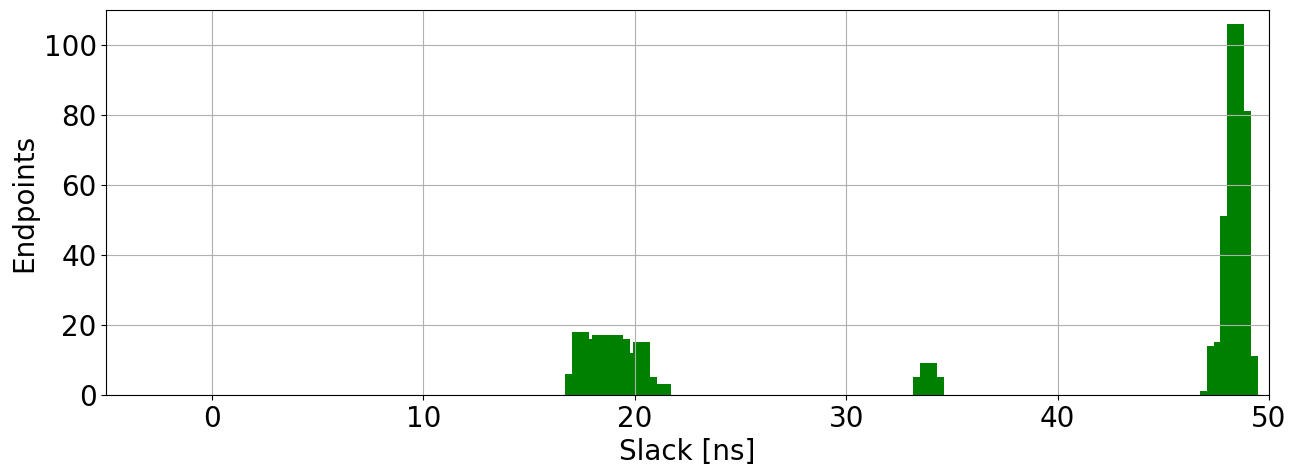

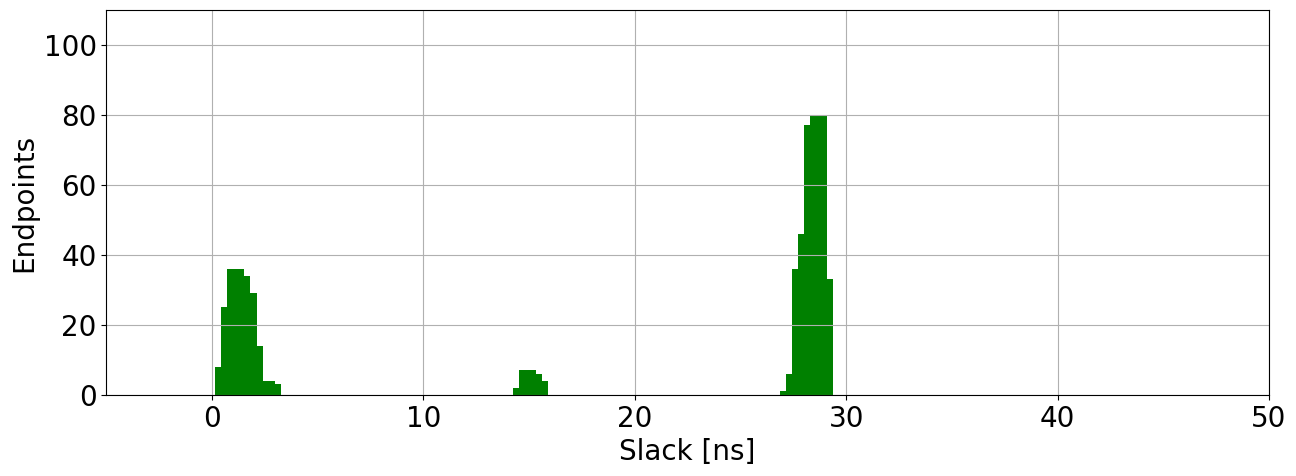

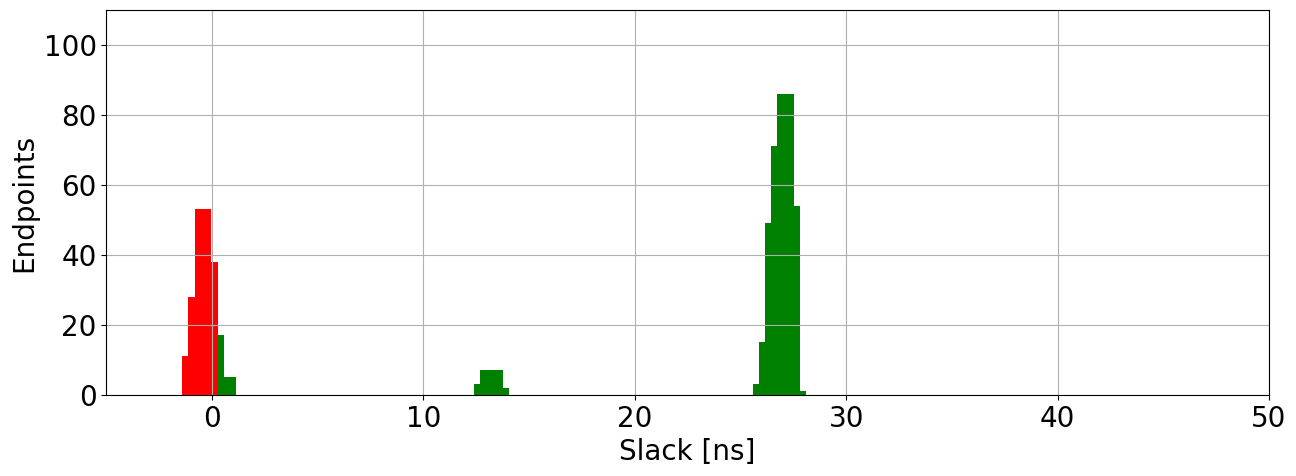

In [13]:
report_20MHz = pd.read_excel('src/report/20MHz.xls')
index = (report_20MHz['Slack Range Max'] + report_20MHz['Slack Range Min'])/2
count = report_20MHz['Count']
fig = plt.figure(figsize = (15,5))
plt.bar(index,count, color="g")
plt.grid(True)
plt.xlabel("Slack [ns]", fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Endpoints", fontsize=20)
plt.xlim([-5, 50])
plt.ylim([0, 110])
plt.yticks(fontsize=20)
# plt.savefig(root_path + "filter/slack_20MHz.svg");

report_33MHz = pd.read_excel('src/report/33MHz.xls')
index = (report_33MHz['Slack Range Max'] + report_33MHz['Slack Range Min'])/2
count = report_33MHz['Count']
fig = plt.figure(figsize = (15,5))
plt.bar(index,count, color="g")
plt.grid(True)
plt.xlabel("Slack [ns]", fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Endpoints", fontsize=20)
plt.ylim([0, 110])
plt.xlim([-5, 50])
plt.yticks(fontsize=20)
# plt.savefig(root_path + "filter/slack_33MHz.svg");


report_35MHz = pd.read_excel('src/report/35MHz.xls')
index = (report_35MHz['Slack Range Max'] + report_35MHz['Slack Range Min'])/2
count = report_35MHz['Count']
contador = 0
for i in index:
    if i<0:
        contador=contador+1

plt.figure(figsize = (15,5))
plt.bar(index[contador:],count[contador:], color="g")
plt.bar(index[0:contador], count[0:contador], color="r")
plt.grid(True)
plt.xlabel("Slack [ns]", fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Endpoints")
plt.ylabel("Endpoints", fontsize=20)
plt.ylim([0, 110])
plt.xlim([-5, 50])
plt.yticks(fontsize=20)
# plt.savefig(root_path + "filter/slack_35MHz.svg");
plt.show()


# Salida del ILA y espectro

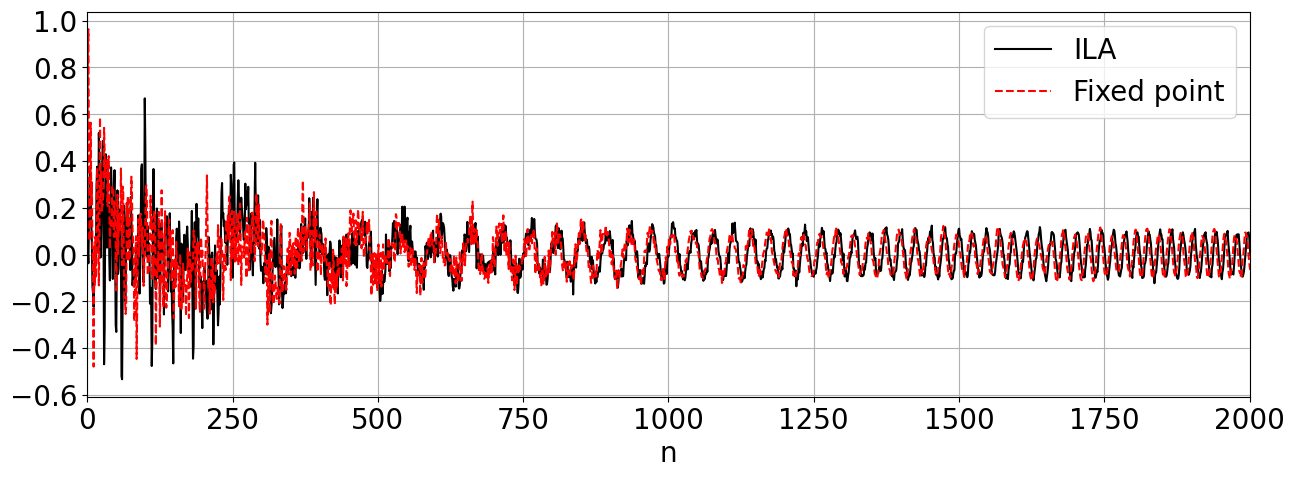

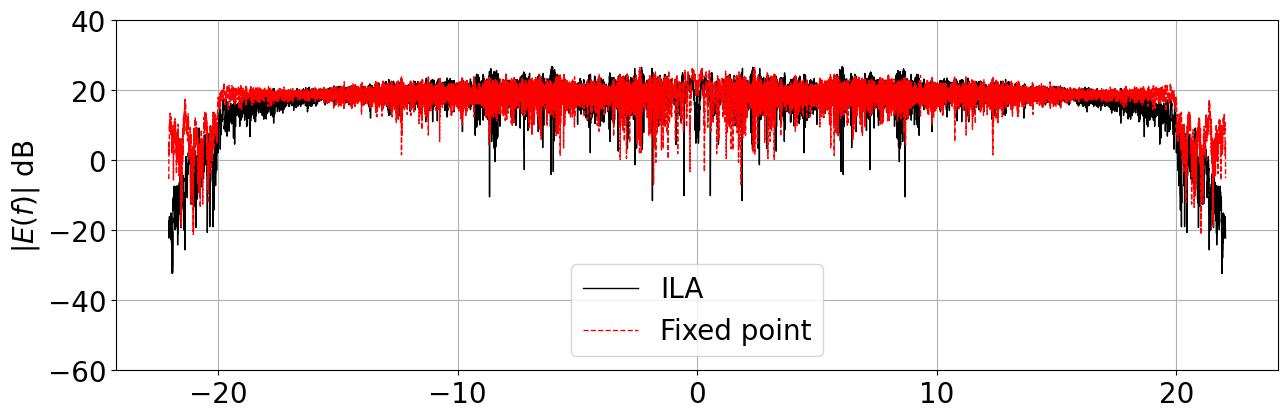

In [14]:
salida = pd.read_csv('src/report/iladata.csv')
index = salida['n']
out = salida['ila']/2**NBF_DATA
fig = plt.figure(figsize = (15,5))
plt.plot(index[:-4],out[4:], 'k', label="ILA")
plt.plot(index[:-1],salida_fixed_point[:len(index)], '--r', label="Fixed point")
plt.xlim([0, 2000])
plt.xticks(fontsize = 20)
plt.xlabel("n", fontsize=20)
plt.yticks(fontsize=20)
# plt.title("", fontweight="bold", fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
# plt.savefig("/media/kevin/DATA/Cursos/DDA/Practica/TP_final/Informe/filter/ila_vs_fix.svg")



ILA = fftshift(fft(np.array(out)))

# =============================== FFT PLOT ===============================
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(f[:len(ILA)]/1e3, 10*np.log10(abs(ILA)**2), 'k', linewidth=1, label="ILA")
plt.plot(f/1e3, 10*np.log10(abs(E)**2), '--r', linewidth=1, label="Fixed point")
# plt.title("Espectro", fontsize=20, fontweight="bold")
plt.ylabel("$|E(f)|$ dB", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([-60, 40])
plt.legend(fontsize=20)
plt.grid(True)
plt.show()
# plt.savefig("/media/kevin/DATA/Cursos/DDA/Practica/TP_final/Informe/filter/ila_vs_fix_spec.svg")

